In [1]:
import pandas as pd

Task 1: Data loading and Data Analysis


Load the data file into a dataframe object as df


Display the first 5 observation of the dataset

In [3]:
df = pd.read_csv('/content/Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this

In [7]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Perform EDA viz. Is there any missing values in each column of the provided datase

In [14]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Display all the unique status_type of the dataframe

In [15]:
print(df['status_type'].unique())

['video' 'photo' 'link' 'status']


Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [26]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['status_type']= label_encoder.fit_transform(df['status_type']) 
print(df.head())

   status_id  status_type status_published  ...  Column2  Column3  Column4
0          1            3   4/22/2018 6:00  ...      NaN      NaN      NaN
1          2            1  4/21/2018 22:45  ...      NaN      NaN      NaN
2          3            3   4/21/2018 6:17  ...      NaN      NaN      NaN
3          4            1   4/21/2018 2:29  ...      NaN      NaN      NaN
4          5            1   4/18/2018 3:22  ...      NaN      NaN      NaN

[5 rows x 16 columns]


In [28]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['status_published']= label_encoder.fit_transform(df['status_published']) 
print(df.head())

   status_id  status_type  status_published  ...  Column2  Column3  Column4
0          1            3              3949  ...      NaN      NaN      NaN
1          2            1              3917  ...      NaN      NaN      NaN
2          3            3              3921  ...      NaN      NaN      NaN
3          4            1              3920  ...      NaN      NaN      NaN
4          5            1              3832  ...      NaN      NaN      NaN

[5 rows x 16 columns]


In [37]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,3949,529,512,262,432,92,3,1,1,0
1,2,1,3917,150,0,0,150,0,0,0,0,0
2,3,3,3921,227,236,57,204,21,1,1,0,0
3,4,1,3920,111,0,0,111,0,0,0,0,0
4,5,1,3832,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,6691,89,0,0,89,0,0,0,0,0
7046,7047,1,6676,16,0,0,14,1,0,1,0,0
7047,7048,1,6643,2,0,0,1,1,0,0,0,0
7048,7049,1,6625,351,12,22,349,2,0,0,0,0


Task 2: Feature Scaling

Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique

In [40]:

from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000247,0.000741,0.975126,0.130626,0.126428,0.064696,0.106674,0.022718,0.000741,0.000247,0.000247,0.0
1,0.000510,0.000255,0.998537,0.038239,0.000000,0.000000,0.038239,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000761,0.000761,0.995075,0.057608,0.059892,0.014466,0.051771,0.005329,0.000254,0.000254,0.000000,0.0
3,0.001020,0.000255,0.999199,0.028294,0.000000,0.000000,0.028294,0.000000,0.000000,0.000000,0.000000,0.0
4,0.001301,0.000260,0.997048,0.055420,0.000000,0.000000,0.053079,0.002342,0.000000,0.000000,0.000000,0.0


Use Elbow method to determine the number of cluster to be formed

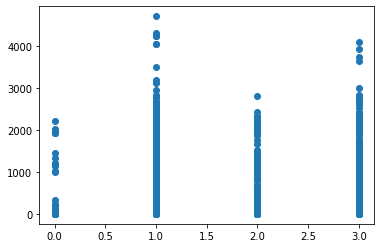

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X1 = df['status_type']
X2 = df['num_likes']
plt.scatter(X1,X2)
plt.show()

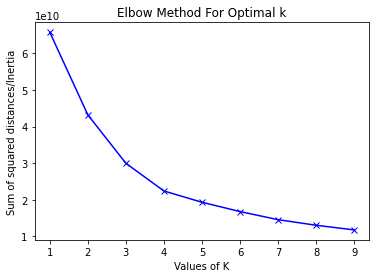

In [48]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Verify optimal number of clusers on the basis of silhouette scores

In [52]:

# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:

# determining the maximum number of clusters 
# using the simple method
limit = int((df_new.shape[0]//2)**0.5)
  
# determing number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(df_new)
    pred = model.predict(df_new)
    score = silhouette_score(df_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.896
Silhouette Score for k = 3: 0.792
Silhouette Score for k = 4: 0.812
Silhouette Score for k = 5: 0.809
Silhouette Score for k = 6: 0.804
Silhouette Score for k = 7: 0.763
Silhouette Score for k = 8: 0.751
Silhouette Score for k = 9: 0.750
Silhouette Score for k = 10: 0.671
Silhouette Score for k = 11: 0.689
Silhouette Score for k = 12: 0.699
Silhouette Score for k = 13: 0.704
Silhouette Score for k = 14: 0.703
Silhouette Score for k = 15: 0.706
Silhouette Score for k = 16: 0.679
Silhouette Score for k = 17: 0.672
Silhouette Score for k = 18: 0.666
Silhouette Score for k = 19: 0.672
Silhouette Score for k = 20: 0.665
Silhouette Score for k = 21: 0.644
Silhouette Score for k = 22: 0.642
Silhouette Score for k = 23: 0.636
Silhouette Score for k = 24: 0.606
Silhouette Score for k = 25: 0.621
Silhouette Score for k = 26: 0.620
Silhouette Score for k = 27: 0.619
Silhouette Score for k = 28: 0.622
Silhouette Score for k = 29: 0.604
Silhouette Score for k = 30:

Assigning cluster label to each instance of the dataframe

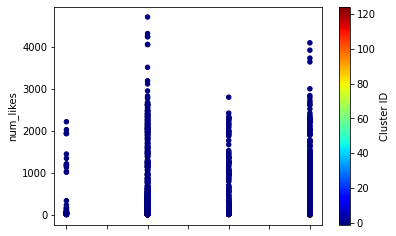

In [64]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((df,labels), axis=1)
result.plot.scatter(x='status_type',y='num_likes',c='Cluster ID', colormap='jet')

[[2.06181015e+00 9.80099338e+02]
 [1.57009346e+00 2.25277103e+03]
 [1.68416105e+00 9.24292652e+01]]


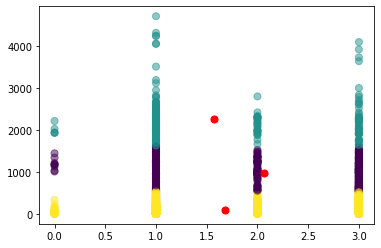

In [65]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': df['status_type'],
        'y': df['num_likes']
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [102]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
new = df._get_numeric_data().dropna(axis=1)
km.fit(new)
predict=km.predict(new)

In [103]:
df['CLUSTERS'] = pd.Series(predict, index=df.index)

In [106]:
df.head()


,num_likes,status_type,NEW_COLUMN,CLUSTERS
0,3,432,6,0
1,1,150,0,0
2,3,204,9,0
3,1,111,0,0
4,1,204,9,0


Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

In [116]:
df2 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')

In [117]:
df2.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


Use PCA to find the first two principal components of the fruit dataset

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [120]:
print(pca.components_)

[[ 1.41365239e-04  9.99998248e-01  1.68965606e-03  7.92944311e-04]
 [-8.18881561e-03  1.69329535e-03 -9.99959881e-01 -3.21145084e-03]]


In [121]:
print(pca.explained_variance_)

[2.02026108e+05 7.71573830e+00]


In [123]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-0.15000000000000002, 3.15, -235.5, 4945.5)

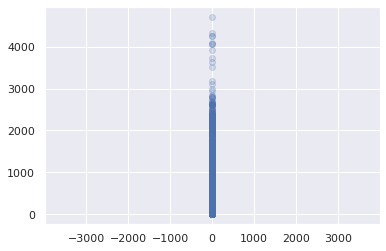

In [126]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    

# plot data
plt.scatter(df['num_likes'], df['status_type'], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [128]:
pca = PCA(n_components=1)
pca.fit(df)
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)

original shape:    (7050, 4)
transformed shape: (7050, 1)


(-0.15000000000000002, 3.15, -235.5, 4945.5)

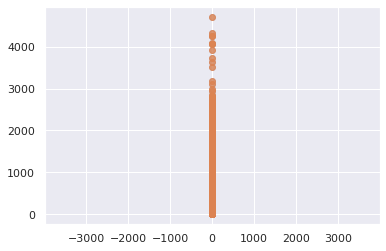

In [129]:
df_new = pca.inverse_transform(df_pca)
plt.scatter(df['num_likes'], df['status_type'], alpha=0.2)
plt.scatter(df_new[:, 0], df_new[:, 1], alpha=0.8)
plt.axis('equal')